In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

In [2]:
def img(fname):
    i = 2
    counter = 0
    n_cells = {}
    connections = {}

    with open(fname + '.txt', 'r') as f:
        lines = f.readlines()

        while i < len(lines):
            if lines[i][0] == '#':
                counter += 1

                s, t, m, n = tuple(map(int, lines[i][2:].split(' ')))

                if not s in n_cells:
                    n_cells.update({s: n})
                if not t in n_cells:
                    n_cells.update({t: m})

                txt = [l.split() for l in lines[i+1 : i+1+m]]

                c = np.array(txt, dtype=np.float64).reshape((m, n))
                if c.any(): # any non-zeros
                    connections.update({(s, t): c})

                i += m + 1
            else:
                raise ValueError

    if counter == 0:
        print('No interneuron for', fname)
        return float(lines[0]), NO_INTERNEURON

    if len(connections) == 0:
        print('No non-trivial weight for', fname)
        return float(lines[0]), NO_NON_TRIVIAL_W
    
    return n_cells, connections

NameError: name 'im' is not defined

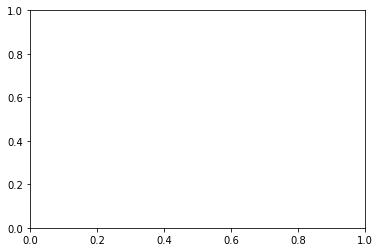

In [3]:
fig,ax = plt.subplots()
plt.colorbar(im,ax=ax)
ax.remove()

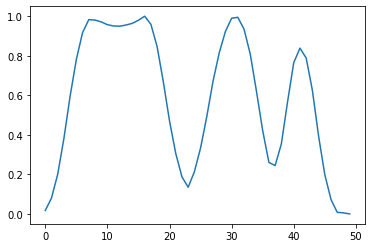

In [4]:
I = np.random.uniform(-0.2, 0.2, 50)
I[4:20] += 1
I[27:35] += 1
I[40:44] += 1
I = np.convolve(I, [0.065, 0.12, 0.175, 0.2, 0.175, 0.12, 0.065], 'same')
I = (I - I.min()) / (I.max() - I.min())
plt.plot(I)

In [17]:
noise_var = []
for i in range(9):
    n_cells, connections = img('class_perc/noise_0.3_1/%d'%i)
    noise_var.append((n_cells, connections))

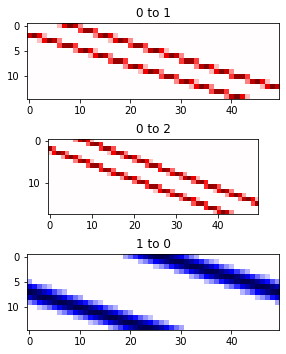

In [22]:
# fig = plt.figure(constrained_layout=True)
# gs = fig.add_gridspec(3, 4)
# ax = fig.add_subplot(gs[0, :2])
# ax.imshow(connections[(0, 1)], cmap='seismic', vmin=-1, vmax=1)
# ax.set_title('0 to 1')
# ax = fig.add_subplot(gs[0, 2:])
# ax.imshow(connections[(0, 2)], cmap='seismic', vmin=-1, vmax=1)
# ax.set_title('0 to 2')
# ax = fig.add_subplot(gs[1, :2])
# ax.imshow(connections[(0, 3)], cmap='seismic', vmin=-1, vmax=1)
# ax.set_title('0 to 3')
# ax = fig.add_subplot(gs[1, 2:])
# ax.imshow(connections[(1, 0)].T, cmap='seismic', vmin=-1, vmax=1)
# ax.set_title('1 to 0')
# ax = fig.add_subplot(gs[2, 0])
# ax.imshow(connections[(1, 2)], cmap='seismic', vmin=-1, vmax=1)
# ax.set_title('1 to 2')
# ax = fig.add_subplot(gs[2, 1])
# ax.imshow(connections[(2, 1)], cmap='seismic', vmin=-1, vmax=1)
# ax.set_title('2 to 1')
# ax = fig.add_subplot(gs[2, 2:])
# ax.imshow(connections[(2, 0)].T, cmap='seismic', vmin=-1, vmax=1)
# ax.set_title('2 to 0')

t = 5

fig, ax = plt.subplots(3)
fig.tight_layout()
fig.set_size_inches(h=5, w=5)
for i, k in enumerate(noise_var[t][1].keys()):
    c = noise_var[t][1][k]
    if c.shape[0] > c.shape[1]:
        c = c.T
    
    im = ax[i].imshow(c, cmap='seismic', vmin=-1, vmax=1)
    ax[i].set_title('%d to %d' % (k))
    

# fig.colorbar(im, ax=ax)

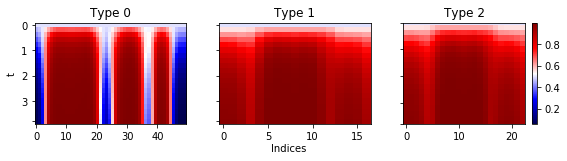

In [7]:
tmax = 20
dt = 0.2
states = [np.zeros((tmax, n_cells[i])) for i in range(len(n_cells))]

for t in range(1, tmax):
    for i in range(len(states)):
        aux = - states[i][t-1]
        
        for j in range(len(states)):
            wji = connections.get((j, i))
            if wji is None:
                continue
                    
            aux += wji @ expit(states[j][t-1])
            
        states[i][t] = states[i][t-1] + dt / 2 * aux
        
        if i == 0:
            states[i][t] += I

            
maxs = [expit(s).max() for s in states]
mins = [expit(s).min() for s in states]

maxs = max(maxs)
mins = min(mins)

fig, ax = plt.subplots(1, len(states), sharey='all') # For easy modification in the future
fig.set_size_inches(8, 2)
fig.tight_layout()

t = np.arange(tmax) * dt
for i, s in enumerate(states):
    im = ax[i].imshow(expit(s), aspect='auto', cmap='seismic', vmin=mins, vmax=maxs)
    ax[i].set_yticks([0, 5, 10, 15, 19])
    ax[i].set_yticklabels([0, 1, 2, 3])
    ax[i].set_title('Type %d' % i)
ax[0].set_ylabel('t')
fig.text(0.5, 0, 'Indices', ha='center')
fig.colorbar(im, ax=ax[-1])

Text(0, 0.5, 'Intensity')

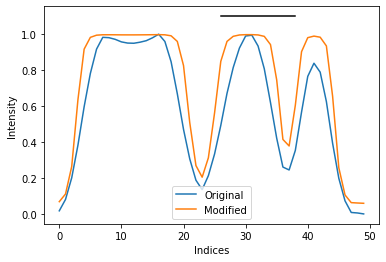

In [8]:
plt.plot(I, label='Original')
plt.plot(expit(states[0][-1]), label='Modified')
plt.plot(np.arange(26, 39), np.ones(39 - 26)+0.1, c='black')
plt.legend()
plt.xlabel('Indices')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

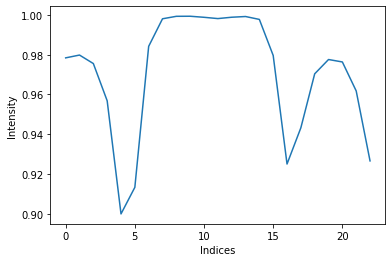

In [9]:
plt.plot(expit(states[-1][-1]))
plt.xlabel('Indices')
plt.ylabel('Intensity')

In [10]:
rec0 = expit(states[0][-1])
rgc0 = expit(states[-1][-1])

In [11]:
rec1 = expit(states[0][-1])
rgc1 = expit(states[-1][-1])

In [12]:
rec8 = expit(states[0][-1])
rgc8 = expit(states[-1][-1])

In [13]:
rec9 = expit(states[0][-1])
rgc9 = expit(states[-1][-1])

Text(0, 0.5, 'Intensity')

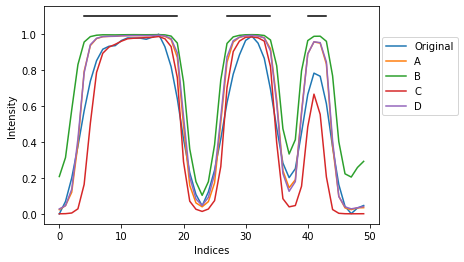

In [401]:
plt.plot(I, label='Original')

for i, r in zip(('A', 'B', 'C', 'D'), (rec0, rec1, rec8, rec9)):
    plt.plot(r, label=i)


plt.plot(np.arange(4, 20), np.ones(20 - 4)+0.1, c='black')
plt.plot(np.arange(27, 35), np.ones(35 - 27)+0.1, c='black')
plt.plot(np.arange(40, 44), np.ones(44 - 40)+0.1, c='black')
plt.legend(loc=[1.01, 0.5])
plt.xlabel('Indices')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

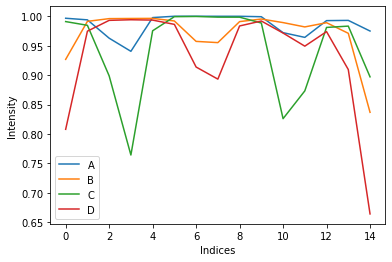

In [402]:
for i, r in zip(('A', 'B', 'C', 'D'), (rgc0, rgc1, rgc8, rgc9)):
    plt.plot(r, label=i)
plt.legend()
plt.xlabel('Indices')
plt.ylabel('Intensity')

Text(0.5, 1.0, 'Maximum')

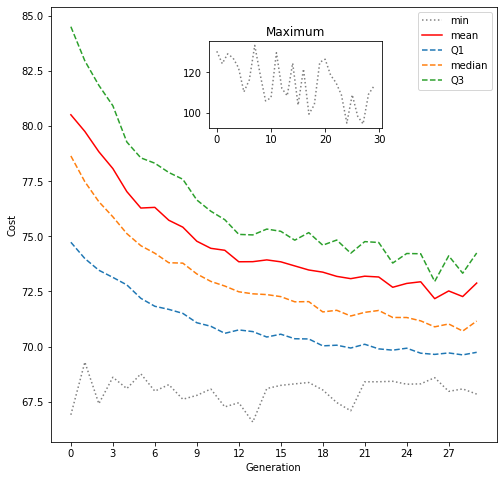

In [183]:
log = np.loadtxt('class_perc/0.0005_1/LOG', dtype=np.float64)
q = np.nanquantile(log, [0.25, 0.5, 0.75], axis=1).T
log = np.ma.masked_invalid(log)
log_mean = log.mean(axis=1)
fig, ax = plt.subplots(1)
fig.set_size_inches(8, 8)

ax.plot(log.min(axis=1), color='gray', linestyle='dotted')
ax.plot(log_mean, color='red')
ax.plot(q, linestyle='dashed')
ax.legend(['min', 'mean', 'Q1', 'median', 'Q3'], loc='upper right')

ax.set_xlabel('Generation')
ax.set_ylabel('Cost')
ax.set_xticks(np.arange(0, log.shape[0], log.shape[0] // 10))

a = plt.axes([0.4, 0.67, 0.3, 0.15])
a.plot(log.max(axis=1), color='gray', linestyle='dotted')
a.set_title('Maximum')